In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Shopping_data01.csv")
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,2099000.0,20
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,4371000.0,20
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,3262000.0,40
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,6955000.0,40
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,6672000.0,60


## Check List

- 상품들의 전체 평균 방송 시간은?
- 방송시간의 길이는 취급액에 따라 달라질까?
- 상품군을 더 자세하게 볼 필요가 있을까?
- 판매 단가가와 상품군의 상관 관계
- 상품명에서 무이자와 일시불 차이가 클까? + (일), (무)
- 상품명에서 남성과 여성의 차이가 클까?
- 방송 시간대가 영향을 미칠까?
- 판매단가가 0인 경우 무조건 0일까?
- 취급액은 누적액일까?
    - 그럴 것으로 추정
- 취급액 / 판매단가 = 판매 수
- 판매수 누적? 20분당 판매 수?
- 취급액 -> 20분당 판매 액수 확인
- 누적 방송시간 넣기

### - 상품들의 전체 평균 방송 시간은?

- 상품코드, 누적노출 max 활용
- 상품코드별 평균 노출 시간
- 상품군별 평균 노출 시간

In [3]:
product_code = data['상품코드'].unique()
code_date_data = pd.DataFrame()

for code in product_code:
    temp = data[data['상품코드'] == code].copy()
    dates = temp['날짜'].unique()
    
    for date in dates:
        code_date_data = pd.concat([code_date_data,
                                    data[(data['상품코드'] == code) & (data['날짜'] == date)].iloc[-1]], axis=1)

In [6]:
code_date_data.head()

,4,166,5,167,8,75,309,461,11,370,...,38134,38166,38175,38209,38212,38268,38269,38270,38306,38308
방송일시,2019-01-01 06:40:00,2019-01-03 00:20:00,2019-01-01 06:40:00,2019-01-03 00:20:00,2019-01-01 07:40:00,2019-01-02 08:40:00,2019-01-04 14:40:00,2019-01-06 10:40:00,2019-01-01 08:40:00,2019-01-05 11:40:00,...,2019-12-30 01:00:00,2019-12-30 14:00:00,2019-12-30 17:00:00,2019-12-31 02:00:00,2019-12-31 07:00:00,2019-12-31 20:00:00,2019-12-31 20:00:00,2019-12-31 20:00:00,2020-01-01 01:00:00,2020-01-01 01:40:00
노출(분),20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
마더코드,100346,100346,100346,100346,100305,100305,100305,100305,100808,100808,...,100057,100338,100415,100439,100458,100594,100594,100594,100073,100490
상품코드,201072,201072,201079,201079,200974,200974,200974,200974,202377,202377,...,200142,201054,201314,201357,201416,201819,201821,201823,200196,201478
상품명,테이트 남성 셀린니트3종,테이트 남성 셀린니트3종,테이트 여성 셀린니트3종,테이트 여성 셀린니트3종,오모떼 레이스 파운데이션 브라,오모떼 레이스 파운데이션 브라,오모떼 레이스 파운데이션 브라,오모떼 레이스 파운데이션 브라,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,...,뉴트리원 다이어트 구미 시즌2,스튜디오럭스 밴딩팬츠 4종,코몽트 기모 터틀넥 5종,루시헨느 레이스 홀리데이 란쥬 패키지,크리스티나앤코 리버시블 패딩,레스토닉 블루투스 LED 서랍 침대 슈퍼싱글,레스토닉 블루투스 LED 서랍 침대 퀸,레스토닉 블루투스 LED 서랍 침대 킹,삼성화재 행복한파트너 주택화재보험(1912),더케이 예다함 상조서비스(티포트)


In [7]:
code_date_data = code_date_data.T
code_date_data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,이익,누적노출
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6.672e+06,2019-01-01 00:00:00,6.672e+06,60
166,2019-01-03 00:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,1.0481e+07,2019-01-03 00:00:00,1.0481e+07,40
5,2019-01-01 06:40:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,9.337e+06,2019-01-01 00:00:00,9.337e+06,60
167,2019-01-03 00:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,2.252e+07,2019-01-03 00:00:00,2.252e+07,40
8,2019-01-01 07:40:00,20,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,2.537e+07,2019-01-01 00:00:00,2.537e+07,60


In [14]:
code_date_data['방송일시'] = pd.to_datetime(code_date_data['방송일시'])
code_date_data = code_date_data.sort_values("방송일시")

In [24]:
code_date_data[['판매단가', '취급액', '이익', '누적노출']] = \
code_date_data[['판매단가', '취급액', '이익', '누적노출']].fillna(0).astype(int)

In [36]:
code_date_data.describe()
# 평균 누적노출 시간: 60분
# 평균 취급액(방송의 최종 이익): 2.941390e+07
# 평균 판매단가: 4.706251e+05 
# 가장 비싼 판매단가: 7.930000e+06

,판매단가,취급액,이익,누적노출
count,1.303600e+04,1.303600e+04,1.303600e+04,13036.000000
mean,4.706251e+05,2.941390e+07,2.941390e+07,60.283062
std,7.415497e+05,2.415647e+07,2.415647e+07,11.727161
min,0.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,5.900000e+04,1.061850e+07,1.061850e+07,60.000000
50%,1.098500e+05,2.362750e+07,2.362750e+07,60.000000
75%,5.090000e+05,4.328725e+07,4.328725e+07,60.000000
max,7.930000e+06,2.410790e+08,2.410790e+08,240.000000


In [28]:
code_date_data.describe(include=['O'])

# 가장 많이 반복된 상품명: 한일 대용량 스텐스 분쇄믹서기
# 가장 많이 반복된 상품코드: 200864

,노출(분),마더코드,상품코드,상품명,상품군,날짜
count,13036,13036,13036,13036,13036,13036
unique,6,716,2124,1770,12,366
top,20,100148,200864,한일 대용량 스텐 분쇄믹서기,주방,2019-09-22 00:00:00
freq,11459,862,106,131,2276,55


In [35]:
print("1년 최종이익: \t\t", code_date_data['이익'].sum())
print("1년 총 방송 시간(분): \t", code_date_data['누적노출'].sum())
print("1년 ")

1년 최종이익: 		 383439551000
1년 총 방송 시간(분): 	 785850


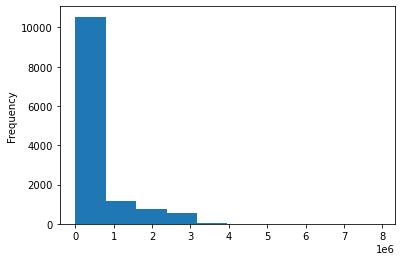

In [46]:
# 판매단가 그래프
code_date_data['판매단가'].sort_values().plot(kind='bar')

In [41]:
# 취급액 그래프
code_date_data['취급액'].sort_values().plot(kind='bar')

Error in callback <function flush_figures at 0x7fcb0fd50ca0> (for post_execute):


KeyboardInterrupt: 